# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [251]:
import keras
import numpy as np
from numpy import zeros
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [252]:

#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)



## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [253]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#  prefix with a is digits 0 to 4 and prefix with b is 5 to 9





In [254]:

aX_train = X_train[y_train <5 ]
ay_train = y_train[y_train <5]
aX_test=X_test[y_test <5 ]
ay_test=y_test[y_test<5]
    
bX_train=   X_train[y_train >4 ]
by_train=   y_train[y_train >4]
bX_test=   X_test[y_test >4 ]
by_test= y_test[y_test>4]
    


In [255]:
print (ay_train)

[0 4 1 ... 2 1 3]


In [256]:
print(aX_train.shape)
print(ay_train.shape)
print(aX_test.shape)
print(ay_test.shape)

print(bX_train.shape)
print(by_train.shape)
print(bX_test.shape)
print(by_test.shape)


(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)
(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


## 3. Print x_train, y_train, x_test and y_test for both the datasets

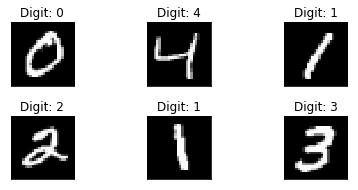

In [257]:
# this category is less than 4 prefixed with a, and it is from train dataset
figa = plt.figure()
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(aX_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(ay_train[i]))
  plt.xticks([])
  plt.yticks([])
#figa





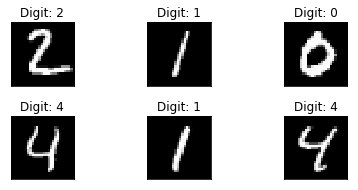

In [258]:
# this category is less than 4 prefixed with a, and it is from test dataset

figa = plt.figure()
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(aX_test[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(ay_test[i]))
  plt.xticks([])
  plt.yticks([])

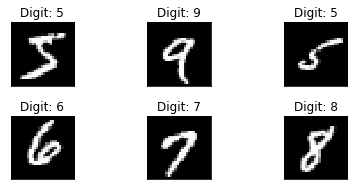

In [259]:
# this category is greater than 4 prefixed with b, and it is from train dataset

for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(bX_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(by_train[i]))
  plt.xticks([])
  plt.yticks([])
#fig


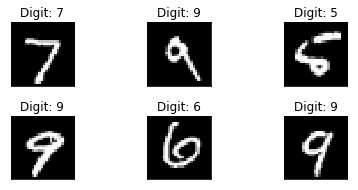

In [260]:
# this category is greater than 4 prefixed with b, and it is from test dataset

for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(bX_test[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(by_test[i]))
  plt.xticks([])
  plt.yticks([])

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [261]:
X_train = aX_train.reshape(aX_train.shape[0], 28, 28, 1)
X_test = aX_test.reshape(aX_test.shape[0], 28, 28, 1)

## 5. Normalize x_train and x_test by dividing it by 255

In [262]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255


## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [263]:
number_of_classes = 5
Y_train = np_utils.to_categorical(ay_train, number_of_classes)
Y_test = np_utils.to_categorical(ay_test, number_of_classes)


## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [264]:
##model building

img_rows=28
img_cols=28
input_shape = (img_rows, img_cols, 1)

model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again

#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))


## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [265]:

model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(number_of_classes, activation='softmax'))

## 9. Print the training and test accuracy

In [276]:
print (X_train.shape)
#print (ay_train.shape)
print (Y_train.shape)
print (X_test.shape)
#print (ay_test.shape)
print (Y_test.shape)



(29404, 28, 28, 1)
(29404, 5)
(4861, 28, 28, 1)
(4861, 5)


In [267]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))




Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 47s 2ms/step - loss: 0.1770 - acc: 0.9436 - val_loss: 0.0306 - val_acc: 0.9895
Epoch 2/10
30596/30596 [==============================] - 50s 2ms/step - loss: 0.0544 - acc: 0.9836 - val_loss: 0.0174 - val_acc: 0.9932
Epoch 3/10
30596/30596 [==============================] - 52s 2ms/step - loss: 0.0367 - acc: 0.9888 - val_loss: 0.0090 - val_acc: 0.9959
Epoch 4/10
30596/30596 [==============================] - 49s 2ms/step - loss: 0.0283 - acc: 0.9916 - val_loss: 0.0095 - val_acc: 0.9979
Epoch 5/10
30596/30596 [==============================] - 50s 2ms/step - loss: 0.0249 - acc: 0.9928 - val_loss: 0.0064 - val_acc: 0.9979
Epoch 6/10
30596/30596 [==============================] - 56s 2ms/step - loss: 0.0195 - acc: 0.9943 - val_loss: 0.0054 - val_acc: 0.9979
Epoch 7/10
30596/30596 [==============================] - 55s 2ms/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0058 - val_acc:

In [268]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])  
print('Test accuracy:', score[1])  

Test loss: 0.0055429645629988785
Test accuracy: 0.9984432769021211


In [269]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_8 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               991360    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [270]:
for layer in model.layers[:8]:
       print (layer.name)
       if 'dense'  in layer.name:
         layer.trainabe=True
       if 'conv2d' in layer.name:
         layer.trainable=False


conv2d_22
max_pooling2d_10
dropout_11
conv2d_23
flatten_8
dense_10
dropout_12
dense_11


In [271]:
print (model.layers[0].trainable)
print(model.layers[3].trainable)
print(model.layers[5].trainable)
print(model.layers[7].trainable)



False
False
True
True


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [272]:
X_train = bX_train.reshape(bX_train.shape[0], 28, 28, 1)
X_test = bX_test.reshape(bX_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

print (np.unique(by_train))
print (np.unique(by_test))

b_y_train=by_train-5
b_y_test=by_test-5

# b_y_train[:] = [x - 5 for x in by_train]
# b_y_test[:] = [x - 5 for x in by_test]


Y_train = np_utils.to_categorical(b_y_train,5)
Y_test = np_utils.to_categorical(b_y_test, 5)


[5 6 7 8 9]
[5 6 7 8 9]


In [273]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(29404, 28, 28, 1)
(29404, 5)
(4861, 28, 28, 1)
(4861, 5)


In [274]:
model_log = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 45s 2ms/step - loss: 0.2200 - acc: 0.9391 - val_loss: 0.0436 - val_acc: 0.9854
Epoch 2/10
29404/29404 [==============================] - 47s 2ms/step - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0310 - val_acc: 0.9907
Epoch 3/10
29404/29404 [==============================] - 45s 2ms/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0293 - val_acc: 0.9889
Epoch 4/10
29404/29404 [==============================] - 47s 2ms/step - loss: 0.0409 - acc: 0.9880 - val_loss: 0.0217 - val_acc: 0.9912
Epoch 5/10
29404/29404 [==============================] - 48s 2ms/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.0202 - val_acc: 0.9928
Epoch 6/10
29404/29404 [==============================] - 46s 2ms/step - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0196 - val_acc: 0.9928
Epoch 7/10
29404/29404 [==============================] - 45s 2ms/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0194 - val_acc:

## 12. Print the accuracy for classification of digits 5 to 9

In [275]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('5 to 9 test loss:', score[0])  
print('5 to 9 Test accuracy:', score[1]) 

5 to 9 test loss: 0.018033785104865127
5 to 9 Test accuracy: 0.9938284303641226


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [323]:
import pandas as pd
# Making a list of missing value types
missing_values = ["n/a", "na", "--","NaN"]
data = pd.read_csv("tweets.csv", na_values = missing_values,encoding='ISO-8859-1')

### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [324]:
def preprocess(text):
    try:
        return text.encode().decode('ascii')
    except Exception as e:
        return ""

In [325]:
data['text'] = [preprocess(text) for text in data.tweet_text]

In [326]:
print (data)

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5     @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                   NaN   
7     #SXSW is just starting, #CTIA is around the co...   
8     Beautifully smart and simple idea RT @madebyma...   
9     Counting down the days to #sxsw plus strong Ca...   
10    Excited to meet the @samsungmobileus at #sxsw ...   
11    Find &amp; Start Impromptu Parties at #SXSW Wi...   
12    Foursquare ups the game, just in time for #SXS...   
13    Gotta love this #SXSW Google Calendar featurin...   
14    Great #sxsw ipad app from @madebymany: http://...   
15    haha, awesomely rad iPad app by @madebymany ht... 

### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [327]:
data.info()
data[data.isnull().any(axis=1)].head()

data=data[data["is_there_an_emotion_directed_at_a_brand_or_product"].isin(["Positive emotion", "Negative emotion"])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
text                                                  9093 non-null object
dtypes: object(4)
memory usage: 284.2+ KB


### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [328]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(data.tweet_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [329]:
print (vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


### 17. Find number of different words in vocabulary

In [330]:
len(vect.get_feature_names())

6022

#### Tip: To see all available functions for an Object use dir

In [331]:
dir(vect)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_limit_features',
 '_sort_features',
 '_stop_words_id',
 '_validate_params',
 '_validate_vocabulary',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',
 'fixed_vocabulary_',
 'get_feature_names',
 'get_params',
 'get_stop_words',
 'input',
 'inverse_transform',
 'lowercase',
 'max_df',
 'max_features',
 'min_df',


### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [332]:
data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2978
Negative emotion     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [333]:
data['Label'] = np.where(data['is_there_an_emotion_directed_at_a_brand_or_product'] =='Positive emotion', 1, 0)

In [334]:
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,Label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"#SXSW is just starting, #CTIA is around the co...",1
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Beautifully smart and simple idea RT @madebyma...,1
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Counting down the days to #sxsw plus strong Ca...,1
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,Excited to meet the @samsungmobileus at #sxsw ...,1
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,Find &amp; Start Impromptu Parties at #SXSW Wi...,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [355]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


X_train = vect.fit_transform(X_train)
X_test=vect.transform(X_test)




## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [368]:
#import from sklearn.naive_bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X_train_dtm = X_train
X_test_dtm = X_test

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))



0.8610328638497653


In [370]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.8704225352112676


C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  (0, 242)	1
  (0, 371)	1
  (0, 713)	1
  (0, 1322)	1
  (0, 1722)	1
  (0, 2334)	1
  (0, 2769)	1
  (0, 2971)	1
  (0, 3675)	1
  (0, 3832)	1
  (0, 4166)	1
  (0, 4299)	1
  (0, 4313)	1
  (0, 4666)	1
  (1, 128)	1
  (1, 186)	1
  (1, 262)	1
  (1, 315)	2
  (1, 1282)	1
  (1, 1364)	1
  (1, 1888)	1
  (1, 1977)	1
  (1, 1979)	1
  (1, 2158)	1
  (1, 2355)	1
  :	:
  (2480, 3638)	1
  (2480, 4166)	1
  (2480, 4293)	1
  (2481, 1046)	1
  (2481, 1081)	1
  (2481, 1287)	1
  (2481, 1311)	1
  (2481, 1902)	1
  (2481, 2158)	1
  (2481, 2238)	1
  (2481, 2355)	1
  (2481, 2361)	1
  (2481, 2880)	1
  (2481, 4166)	1
  (2482, 844)	1
  (2482, 919)	1
  (2482, 1902)	1
  (2482, 1984)	1
  (2482, 2417)	1
  (2482, 2532)	1
  (2482, 4034)	1
  (2482, 4166)	1
  (2482, 4293)	1
  (2482, 4804)	1
  (2482, 4813)	1


## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [377]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [378]:
vect = CountVectorizer(ngram_range=(1, 2))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

tokenize_test(vect)


Features:  24904
Accuracy:  0.8666666666666667


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [379]:
vect = CountVectorizer(stop_words='english')

tokenize_test(vect)

Features:  4671
Accuracy:  0.8647887323943662


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [380]:
vect = CountVectorizer(stop_words='english', max_features=300)
tokenize_test(vect)

Features:  300
Accuracy:  0.8262910798122066


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [381]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=15000)
tokenize_test(vect)

Features:  15000
Accuracy:  0.8647887323943662


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [382]:
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  7552
Accuracy:  0.8619718309859155
